In [ ]:
ip install atoti
!pip install pyngrok

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#p_reports        = '/content/gdrive/MyDrive/ER_Schema/Reports.csv'
#p_files          = '/content/gdrive/MyDrive/ER_Schema/Files.csv'

p_behaviours     = '/content/gdrive/MyDrive/ER_Schema/Behaviours.csv'
p_attacks        = '/content/gdrive/MyDrive/ER_Schema/Attacks.csv'
p_entries        = '/content/gdrive/MyDrive/ER_Schema/Entries.csv'
p_pulses        = '/content/gdrive/MyDrive/ER_Schema/OTXPulses.csv'

#p_yararules      = '/content/gdrive/MyDrive/Yara_Rules.csv'
#p_addresses      = '/content/gdrive/MyDrive/FileAnalysis/ER_Schema/.csv'

In [ ]:
import pandas as pd
import os

# Create Tables



In [ ]:
import atoti as tt

session = tt.Session()

Welcome to Atoti 0.8.8!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### OTX Pulses

In [ ]:
otxPulses_df = pd.read_csv(p_pulses)

len(otxPulses_df)

1787

In [ ]:
otxPulses_df['date']  = pd.to_datetime(otxPulses_df['date'])

In [ ]:
pulses_keys = [ 'id' ]

column_types = {
    'date' : tt.type.LOCAL_DATE,
}

# Check if the file exists
if not os.path.exists(p_pulses):
    print(f"Error: File not found at {p_pulses}")
else:
    table_name = "pulses"
    pulses = session.read_pandas(otxPulses_df, table_name=table_name, keys = pulses_keys)

In [ ]:
pulses.head()

,sha1,sha256,md5,title,text,date,TLP,reporter
id,,,,,,,,
61df27bead2a20d648be062e,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,"Remcos Active Payload File Hashes, Jan. 12, 2022",,2022-01-12,white,Koochie_Kew
61d97dfc3437895ce4479b58,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,Remcos malware indicators | 20220107,Indicators of compromise extracted from analyz...,2022-01-08,white,maldatabase
620cdabfb8f19ca560725fed,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,C2 & Malware Hashes,,2022-02-16,white,bluewatcher
6204b7f75fdf2fdfa6c963f4,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,Malware Hashes,"Emotet, Mirai, SilentBuilder,vbs, macros etc.",2022-02-10,white,bluewatcher
61f573fc1a0318fded5b9810,a42003f9ac6abdb71221f6d041464c6a681d4a9b,5aacb74b563f8e7ce7f8fac08416fc11e636f334c1c603...,66464eae1c7644223546eaeb87984f74,"Mirai Active Payload File Hashes Jan. 29, 2022",,2022-01-29,white,Koochie_Kew


In [ ]:
merging_df = pd.DataFrame()
merging_df['sha1'] = otxPulses_df.sha1.unique()
merging_df['sha256'] = otxPulses_df.sha256.unique()
merging_df['md5'] = otxPulses_df.md5.unique()
merging_df['max_date'] = otxPulses_df.groupby(['sha1', 'sha256', 'md5'])['date'].transform('max')
merging_df['min_date'] = otxPulses_df.groupby(['sha1', 'sha256', 'md5'])['date'].transform('min')
merging_df

,sha1,sha256,md5,max_date,min_date
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2023-12-06,2022-02-23
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-12-06,2022-02-23
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2023-12-06,2022-02-23
3,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2023-12-06,2022-02-23
4,33379ca7a0e323155a8947fe2aca7ed361890478,848d2b13244077e886eb2d82de5811f8e6a3e8df67784a...,539b022dd96de4597e8b5af9ccdeff9c,2023-08-21,2023-08-11
...,...,...,...,...,...
386,6255ef51d771f308bd184054c87c183994bd61bc,1a30e0d65a8a09abc3feb1c86a0619845fc6ab9bdba3ae...,4c939f8ea09f1251f46277697223dca9,2023-12-06,2023-05-10
387,0e6f43dbceae22222d09f5d7848aa4f24ee42c44,2161a41e36c0bb939dc0203f9e1ada84addcef0e2f3190...,80d706aa41da2983dc3b80782e22dfaa,2023-12-06,2023-05-10
388,a69a081f76356bc96917d8faa07de9101d3286fa,3f2387629a5794a1157e7c0646ca68a97df91211269014...,01f9cbf1462ea24e6ed0d2f6e1fed6b6,2023-12-06,2023-05-10
389,c7d67df0bc1521c17ac46135ea354d21debf39ba,6b50ef85ecbe4f5f12164e709e99ebc9633912b2c73757...,76ce03b2889b8085c7caf240732a861c,2023-12-06,2023-05-10


In [ ]:
merging_df['max_date']  = pd.to_datetime(merging_df['max_date'])
merging_df['min_date']  = pd.to_datetime(merging_df['min_date'])


In [ ]:
entries_keys = [ 'sha1', 'sha256', 'md5' ]

# Check if the file exists
if not os.path.exists(p_pulses):
    print(f"Error: File not found at {p_pulses}")
else:
    table_name = "otxPulses"
    merging = session.read_pandas(merging_df, table_name=table_name, keys = entries_keys)

In [ ]:
merging.head()

,,,max_date,min_date
sha1,sha256,md5,,
411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2023-12-06,2022-02-23
1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-12-06,2022-02-23
8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2023-12-06,2022-02-23
55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2023-12-06,2022-02-23
33379ca7a0e323155a8947fe2aca7ed361890478,848d2b13244077e886eb2d82de5811f8e6a3e8df67784a...,539b022dd96de4597e8b5af9ccdeff9c,2023-08-21,2023-08-11


### ENTRIES

In [ ]:
entries_df = pd.read_csv(p_entries)

entries_df.head()

,sha1,sha256,md5,analysis_date,file_type,delivery_method,verdict,malware_type,malware
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment,malicious,trojan,remcos
1,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-07-19,exe,web download,malicious,trojan,remcos
2,8ab63abfe58fb218cc001581ac0d9fe38c784157,7f514ed5e1ec262953e6252a4089531c519e95d700c580...,855232a26e8afcd0cca5f816a1919dee,2022-01-04,exe,unknown,malicious,ransomware,remcos
3,55cbf8dae95d350ad7e5a63b418f6cd203488f51,8b7ae9f195b075a789d6d8277d500d27754bfa3c53ecca...,97d9d216f2627cb238ca6637580b1739,2022-02-09,exe,unknown,malicious,trojan,remcos
4,a2915c1be9e6134b7bf3ca5ca00eeb0c969bedab,6c2a2251861a6d2701814843fadac940cf4d34db9f446f...,1b09de36dfe5850d7e3fbd6b39c89a43,2021-02-11,exe,web download,malicious,trojan,generic mg


In [ ]:
entries_df['analysis_date']  = pd.to_datetime(entries_df['analysis_date'])

In [ ]:
entries_keys = [ 'sha1', 'sha256', 'md5' ]

column_types = {
    'analysis_date' : tt.type.LOCAL_DATE,
    'first_seen' : tt.type.LOCAL_DATE,
    'last_seen' : tt.type.LOCAL_DATE,
}

# Check if the file exists
if not os.path.exists(p_entries):
    print(f"Error: File not found at {p_entries}")
else:
    table_name = "entries"
    entries = session.read_pandas(entries_df, table_name=table_name, keys = entries_keys)

In [ ]:
merged_df = pd.merge( otxPulses_df, entries_df, left_on=['sha1', 'sha256', 'md5'], right_on=['sha1', 'sha256', 'md5'])

merged_df

,sha1,sha256,md5,id,title,text,date,TLP,reporter,analysis_date,file_type,delivery_method,verdict,malware_type,malware
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,65709aa7e685939cb8ce7484,Malware Bazaar 4,,2023-12-06,green,StreamMiningEx,2021-11-09,exe,email attachment,malicious,trojan,remcos
1,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,65707ef8b5b5810d62645bfd,C2 Servers & Virus Providers & Malware Hashes,,2023-12-06,green,StreamMiningEx,2021-11-09,exe,email attachment,malicious,trojan,remcos
2,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,645b97eb9e10e5961a10455e,Malware Bazaar 4,,2023-05-10,white,LoveAndren,2021-11-09,exe,email attachment,malicious,trojan,remcos
3,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,6215ef048fbebbb7f207044d,C2 Servers & Virus Providers & Malware Hashes,,2022-02-23,white,bluewatcher,2021-11-09,exe,email attachment,malicious,trojan,remcos
4,1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,64e3a32396d5268bdc039d62,KataKobra Test Pulse,Test IOC,2023-08-21,white,katakobra,2023-07-19,exe,web download,malicious,trojan,remcos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,c7d67df0bc1521c17ac46135ea354d21debf39ba,6b50ef85ecbe4f5f12164e709e99ebc9633912b2c73757...,76ce03b2889b8085c7caf240732a861c,657089b5f0f0dc770c21cfbd,stagningtrump.com,,2023-12-06,green,StreamMiningEx,2019-09-17,elf,unknown,malicious,trojan,mirai
1783,c7d67df0bc1521c17ac46135ea354d21debf39ba,6b50ef85ecbe4f5f12164e709e99ebc9633912b2c73757...,76ce03b2889b8085c7caf240732a861c,65334c0ba405b15c0ce465b7,CVE-2022-36537,A security flaw in the Zk Framework that allow...,2023-10-21,green,ellenmmm,2019-09-17,elf,unknown,malicious,trojan,mirai
1784,c7d67df0bc1521c17ac46135ea354d21debf39ba,6b50ef85ecbe4f5f12164e709e99ebc9633912b2c73757...,76ce03b2889b8085c7caf240732a861c,62360e8f1e317407af7afad5,stagningtrump.com,,2022-03-19,white,Kailula4,2019-09-17,elf,unknown,malicious,trojan,mirai
1785,98837feaac2ed17b3709e5183b660dd41e7a1e0e,5b37ddd18800dc91071db31b340e8f9997bb89d42d5a19...,1b47215513edd622ba825dced07c8969,65707ef8b5b5810d62645bfd,C2 Servers & Virus Providers & Malware Hashes,,2023-12-06,green,StreamMiningEx,2021-11-11,exe,unknown,malicious,trojan,crypter gen


In [ ]:
merged_keys = [ 'id' ]

# Check if the file exists
if not os.path.exists(p_entries):
    print(f"Error: File not found at {p_entries}")
else:
    table_name = "merged"
    merged = session.read_pandas(merged_df, table_name=table_name, keys = merged_keys)

merged.head()

Py4JJavaError: An error occurred while calling o557.createStore.
: java.lang.IllegalArgumentException: A store with the name merged already exists! 
If you want to recreate this store, you will have to re-create the session.
	at io.atoti.loading.impl.DataLoaderImpl.addStoreToSchema(DataLoaderImpl.java:53)
	at io.atoti.api.impl.OutsideTransactionDataApiImpl.createStore(OutsideTransactionDataApiImpl.java:87)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.base/java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Unknown Source)


In [ ]:
'''
for i in range(len(otxPulses_df)):

  sha1 = otxPulses_df.at[i, 'sha1']
  sha256 = otxPulses_df.at[i, 'sha256']
  md5 = otxPulses_df.at[i, 'md5']

  tmp = entries_df[( entries_df.sha1 == sha1 ) & ( entries_df.sha256 == sha256 ) & ( entries_df.md5 == md5 )].reset_index()

  print(tmp)

  otxPulses_df['date'] = tmp.at[0, 'date']
  otxPulses_df['file_type'] = tmp.at[0, 'file_type']
  otxPulses_df['delivery_method'] = tmp.at[0, 'delivery_method']
  otxPulses_df['verdict'] = tmp.at[0, 'verdict']
  otxPulses_df['malware_type'] = tmp.at[0, 'malware_type']
  otxPulses_df['malware'] = tmp.at[0, 'malware']

otxPulses_df
'''

"\nfor i in range(len(otxPulses_df)):\n\n  sha1 = otxPulses_df.at[i, 'sha1']\n  sha256 = otxPulses_df.at[i, 'sha256']\n  md5 = otxPulses_df.at[i, 'md5']\n\n  tmp = entries_df[( entries_df.sha1 == sha1 ) & ( entries_df.sha256 == sha256 ) & ( entries_df.md5 == md5 )].reset_index()\n\n  print(tmp)\n\n  otxPulses_df['date'] = tmp.at[0, 'date']\n  otxPulses_df['file_type'] = tmp.at[0, 'file_type']\n  otxPulses_df['delivery_method'] = tmp.at[0, 'delivery_method']\n  otxPulses_df['verdict'] = tmp.at[0, 'verdict']\n  otxPulses_df['malware_type'] = tmp.at[0, 'malware_type']\n  otxPulses_df['malware'] = tmp.at[0, 'malware']\n\notxPulses_df\n"

In [ ]:
entries.head(2)

,,,analysis_date,file_type,delivery_method,verdict,malware_type,malware
sha1,sha256,md5,,,,,,
411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment,malicious,trojan,remcos
1ad9e9761fd6935c0cf5048c9615d0383baac48e,ac901bf5882f14e9e07235b8488b6479b4519addda6dbf...,da9534900ee0d11c9b30cf33152ea03c,2023-07-19,exe,web download,malicious,trojan,remcos


### ATTACKS

In [ ]:
attacks_keys = ['sha1', 'sha256', 'md5' , 'attack_id']

# Check if the file exists
if not os.path.exists(p_attacks):
    print(f"Error: File not found at {p_attacks}")
else:
    attacks = session.read_csv(p_attacks, keys = attacks_keys)

In [ ]:
attacks.head(2)

attack_name  \
sha1                                     sha256                                            md5                              attack_id                                     
713a00b13a87c52b43404cd32d0f4645844709d9 3b96a384f9989f28315eb374eae991e70ed07b88665cbf... 97ad0714b0245825407dd25d7d168d31 T1060      Registry Run Keys / Start Folder   
                                                                                                                            T1056                         Input Capture   

                                                                                                                                        attack_type  
sha1                                     sha256                                            md5                              attack_id                
713a00b13a87c52b43404cd32d0f4645844709d9 3b96a384f9989f28315eb374eae991e70ed07b88665cbf... 97ad0714b0245825407dd25d7d168d31 T1060      Installation  
                                                                                                                            T1056        Objectives

### BEHAVIOURS

In [ ]:
behaviours_df = pd.read_csv(p_behaviours)

behaviours_df.head()

,sha1,sha256,md5,action_name,action_description,maliciousness_level,area
0,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,antidebug guardpages,guard pages use detected - possible anti-debug...,neutral,System Processes
1,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,antidebug setunhandledexceptionfilter,setunhandledexceptionfilter detected (possible...,neutral,System Processes
2,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,cape detected threat,cape detected the asyncrat malware,suspicious,Network Activity
3,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,cmdline terminate,executed a command line with /c or /r argument...,neutral,System Processes
4,007416f9ba10d2e2951a9dcd104b7206ad20d433,094b57a07096fb1f866a104c0b14c84aa99815b6135877...,7baa4836bd81113c16960501f679a81b,dead connect,attempts to connect to a dead ip:port (1 uniqu...,neutral,Network Communications


In [ ]:
behaviours_keys = ['sha1', 'sha256', 'md5' , 'action_name']

# Check if the file exists
if not os.path.exists(p_behaviours):
    print(f"Error: File not found at {p_behaviours}")
else:
    behaviours = session.read_csv(p_behaviours, keys = behaviours_keys)

In [ ]:
behaviours.head(2)

action_description  \
sha1                                     sha256                                            md5                              action_name                                                               
007416f9ba10d2e2951a9dcd104b7206ad20d433 094b57a07096fb1f866a104c0b14c84aa99815b6135877... 7baa4836bd81113c16960501f679a81b antidebug guardpages  guard pages use detected - possible anti-debug...   
                                                                                                                            dead connect          attempts to connect to a dead ip:port (1 uniqu...   

                                                                                                                                                 maliciousness_level  \
sha1                                     sha256                                            md5                              action_name                                
007416f9ba10d2e2951a9dcd104b7206ad20d433 094b57a07096fb1f866a104c0b14c84aa99815b6135877... 7baa4836bd81113c16960501f679a81b antidebug guardpages             neutral   
                                                                                                                            dead connect                     neutral   

                                                                                                                                                                    area  
sha1                                     sha256                                            md5                              action_name                                   
007416f9ba10d2e2951a9dcd104b7206ad20d433 094b57a07096fb1f866a104c0b14c84aa99815b6135877... 7baa4836bd81113c16960501f679a81b antidebug guardpages        System Processes  
                                                                                                                            dead connect          Network Communications

# Create Structures

In [ ]:
cube0 = session.create_cube(pulses)

/usr/local/lib/python3.10/dist-packages/atoti/cube.py:127: FutureWarning: Accessing the database sub schema for a specific cube is deprecated. Use `Session.tables.schema` instead
  deprecated(


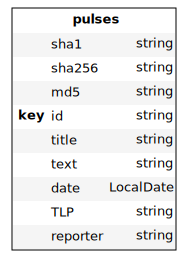

In [ ]:
cube0.schema

In [ ]:
cube0.create_date_hierarchy(
    "Date_pulse_date",
    column=pulses["date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [ ]:
h0, l0, m0 = cube0.hierarchies, cube0.levels, cube0.measures

In [ ]:
h0

{('pulses', 'sha256'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2aa0>, ('pulses', 'md5'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2b00>, ('pulses', 'text'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2590>, ('pulses', 'id'): <atoti.hierarchy.Hierarchy object at 0x7b15238c3e50>, ('pulses', 'title'): <atoti.hierarchy.Hierarchy object at 0x7b15238c28f0>, ('pulses', 'TLP'): <atoti.hierarchy.Hierarchy object at 0x7b15238c3a90>, ('pulses', 'reporter'): <atoti.hierarchy.Hierarchy object at 0x7b15238c0be0>, ('pulses', 'sha1'): <atoti.hierarchy.Hierarchy object at 0x7b15238c3940>, ('pulses', 'date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2230>, ('pulses', 'Date_pulse_date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c1b70>}

In [ ]:
l0

In [ ]:
m0

{'contributors.COUNT': <atoti.measure.Measure object at 0x7b15363c6fe0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7b15237c9600>}

In [ ]:
cube1 = session.create_cube(entries)

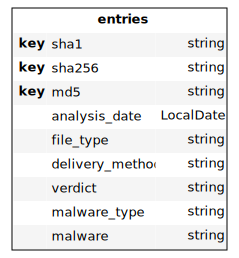

In [ ]:
cube1.schema

In [ ]:
cube1.create_date_hierarchy(
    "Date_analysis_date",
    column=entries["analysis_date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [ ]:
h1, l1, m1 = cube1.hierarchies, cube1.levels, cube1.measures

In [ ]:
h1

{('entries', 'delivery_method'): <atoti.hierarchy.Hierarchy object at 0x7b15238c39a0>, ('entries', 'file_type'): <atoti.hierarchy.Hierarchy object at 0x7b15238c05e0>, ('entries', 'sha1'): <atoti.hierarchy.Hierarchy object at 0x7b15238c0430>, ('entries', 'md5'): <atoti.hierarchy.Hierarchy object at 0x7b15238c3490>, ('entries', 'Date_analysis_date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c09d0>, ('entries', 'analysis_date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c1f90>, ('entries', 'verdict'): <atoti.hierarchy.Hierarchy object at 0x7b15238c22f0>, ('entries', 'malware'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2c20>, ('entries', 'malware_type'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2260>, ('entries', 'sha256'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2a70>}

In [ ]:
l1

In [ ]:
m1

{'contributors.COUNT': <atoti.measure.Measure object at 0x7b15237cba60>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7b15237cac20>}

In [ ]:
cube2 = session.create_cube(merging)

/usr/local/lib/python3.10/dist-packages/atoti/cube.py:127: FutureWarning: Accessing the database sub schema for a specific cube is deprecated. Use `Session.tables.schema` instead
  deprecated(


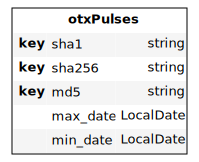

In [ ]:
cube2.schema

In [ ]:
cube2.create_date_hierarchy(
    "Date_min_date",
    column=merging["min_date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

cube2.create_date_hierarchy(
    "Date_max_date",
    column=merging["max_date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [ ]:
h2, l2, m2 = cube2.hierarchies, cube2.levels, cube2.measures

In [ ]:
h2

{('otxPulses', 'md5'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8b80>, ('otxPulses', 'min_date'): <atoti.hierarchy.Hierarchy object at 0x7b15237cbdc0>, ('otxPulses', 'Date_max_date'): <atoti.hierarchy.Hierarchy object at 0x7b15237cb310>, ('otxPulses', 'sha1'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8c40>, ('otxPulses', 'sha256'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8340>, ('otxPulses', 'max_date'): <atoti.hierarchy.Hierarchy object at 0x7b15237c81c0>, ('otxPulses', 'Date_min_date'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8a60>}

In [ ]:
l2

In [ ]:
m2

{'contributors.COUNT': <atoti.measure.Measure object at 0x7b15237ca3b0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7b15238c1360>}

In [ ]:
cube3 = session.create_cube(merged)

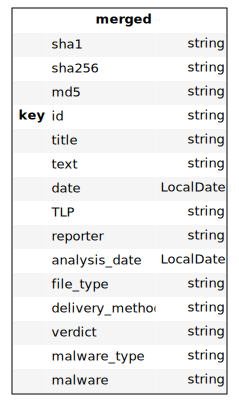

In [ ]:
cube3.schema

In [ ]:
cube3.create_date_hierarchy(
    "Date_pulse_date",
    column=merged["date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

cube3.create_date_hierarchy(
    "Date_pulse_analysis_date",
    column=merged["analysis_date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

In [ ]:
h3, l3, m3 = cube3.hierarchies, cube3.levels, cube3.measures

In [ ]:
h3

{('merged', 'sha256'): <atoti.hierarchy.Hierarchy object at 0x7b1566b90b50>, ('merged', 'verdict'): <atoti.hierarchy.Hierarchy object at 0x7b1566b906a0>, ('merged', 'Date_pulse_analysis_date'): <atoti.hierarchy.Hierarchy object at 0x7b1566b91bd0>, ('merged', 'delivery_method'): <atoti.hierarchy.Hierarchy object at 0x7b152397f310>, ('merged', 'title'): <atoti.hierarchy.Hierarchy object at 0x7b1566b90e20>, ('merged', 'date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c17b0>, ('merged', 'malware_type'): <atoti.hierarchy.Hierarchy object at 0x7b15238c0160>, ('merged', 'sha1'): <atoti.hierarchy.Hierarchy object at 0x7b15238c3e20>, ('merged', 'analysis_date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c37f0>, ('merged', 'Date_pulse_date'): <atoti.hierarchy.Hierarchy object at 0x7b15238c1c90>, ('merged', 'id'): <atoti.hierarchy.Hierarchy object at 0x7b15238c22f0>, ('merged', 'reporter'): <atoti.hierarchy.Hierarchy object at 0x7b15238c2b90>, ('merged', 'TLP'): <atoti.hierarchy.Hierarchy object at 0x7b15238c0ee0>, ('merged', 'file_type'): <atoti.hierarchy.Hierarchy object at 0x7b15238c33d0>, ('merged', 'text'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8eb0>, ('merged', 'malware'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8fa0>, ('merged', 'md5'): <atoti.hierarchy.Hierarchy object at 0x7b15237c8790>}

In [ ]:
l3

In [ ]:
m3

{'contributors.COUNT': <atoti.measure.Measure object at 0x7b15238530d0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x7b1523852290>}

/usr/local/lib/python3.10/dist-packages/atoti/cube.py:127: FutureWarning: Accessing the database sub schema for a specific cube is deprecated. Use `Session.tables.schema` instead
  deprecated(


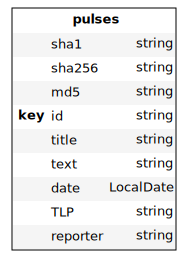

In [ ]:
cube0.schema

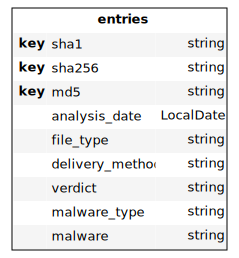

In [ ]:
cube1.schema

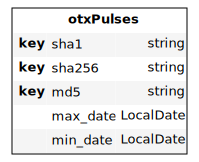

In [ ]:
cube2.schema

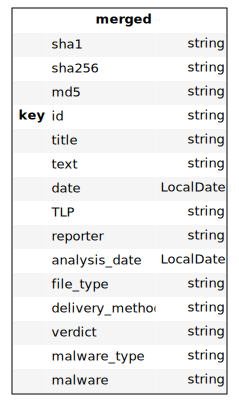

In [ ]:
cube3.schema

# Files Queries

### Files analysis time distritution by month in Malware Bazaar

In [ ]:
_df1 = cube1.query(m1["contributors.COUNT"], levels=[l1[('entries', 'Date_analysis_date', 'Month')]])


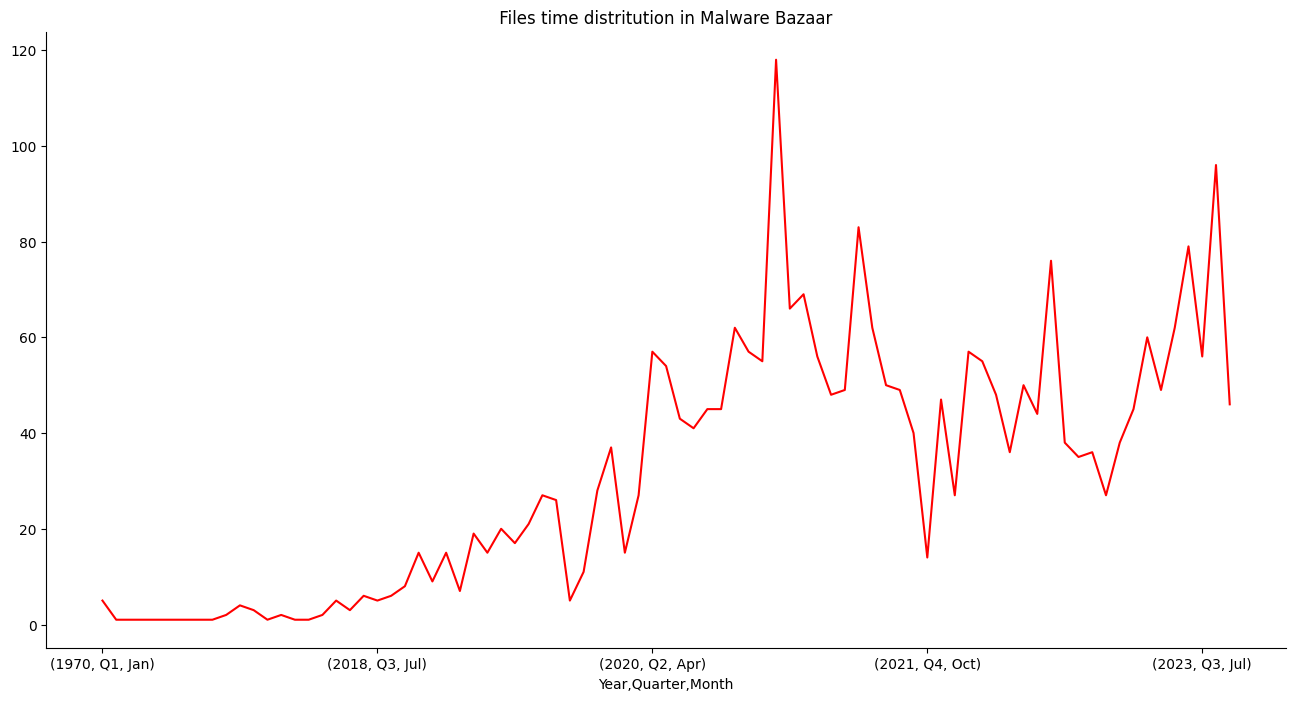

In [ ]:
from matplotlib import pyplot as plt

_df1['contributors.COUNT'].plot(kind='line', figsize=(16, 8), title=' Files time distritution in Malware Bazaar ' , color='red')

plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
_df5 = cube0.query(m0["contributors.COUNT"], levels=[l0[('pulses', 'Date_pulse_date', 'Month')]])


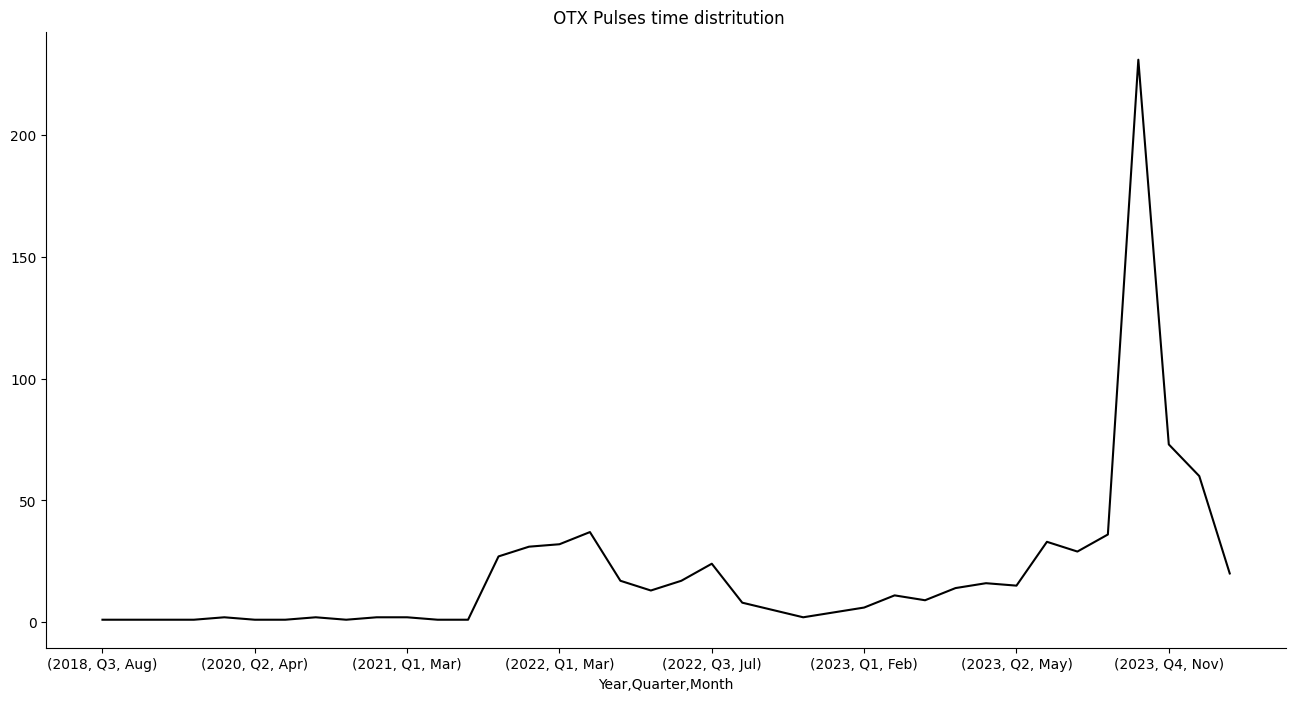

In [ ]:
from matplotlib import pyplot as plt

_df5['contributors.COUNT'].plot(kind='line', figsize=(16, 8), title=' OTX Pulses time distritution' , color='black')

plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
_df3 = cube2.query(m2["contributors.COUNT"], levels=[l2[('otxPulses', 'Date_max_date', 'Month')]])
_df4 = cube2.query(m2["contributors.COUNT"], levels=[l2[('otxPulses', 'Date_min_date', 'Month')]])


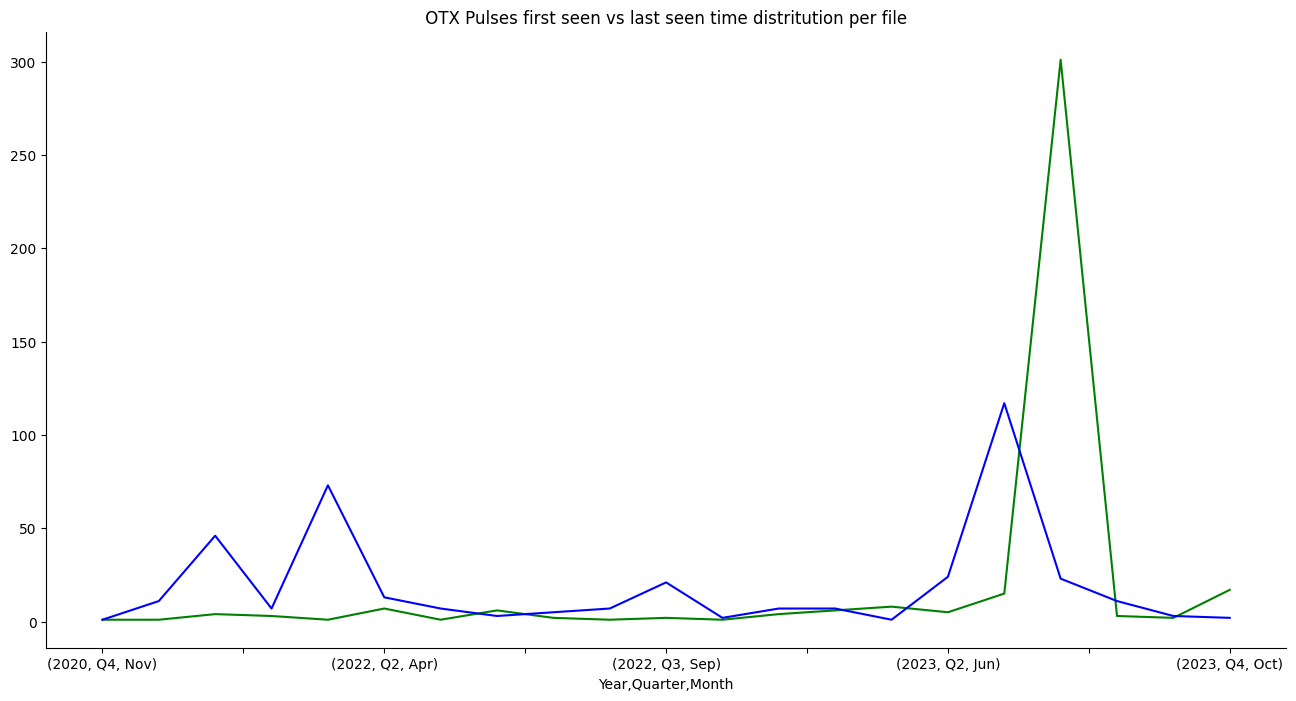

In [ ]:
from matplotlib import pyplot as plt

_df3['contributors.COUNT'].plot(kind='line', figsize=(16, 8), title=' OTX Pulses first seen vs last seen time distritution per file ' , color='green')
_df4['contributors.COUNT'].plot(kind='line', figsize=(16, 8) , color='blue')

plt.gca().spines[['top', 'right']].set_visible(False)

### Delivery Method mostly used in a certain period for a specific malware type

In [ ]:
from datetime import date

In [ ]:
### INPUT DATA

from_date = date(2023, 8, 1)
to_date   = date(2023, 10, 1)
selected_malware = 'ransomware'


In [ ]:
entries_df[entries_df.sha1 == '411535c9548f86034a6a9a603de521a86a3b5466']

,sha1,sha256,md5,analysis_date,file_type,delivery_method,verdict,malware_type,malware
0,411535c9548f86034a6a9a603de521a86a3b5466,04c53261b1220a894a02f5ffb39cdfd73f93481c0b5c81...,5b5a0225a2b7b9a054417662c733168a,2021-11-09,exe,email attachment,malicious,trojan,remcos


In [ ]:
merged_df.id.unique()

array(['65709aa7e685939cb8ce7484', '65707ef8b5b5810d62645bfd',
       '645b97eb9e10e5961a10455e', '6215ef048fbebbb7f207044d',
       '64e3a32396d5268bdc039d62', '64d6a03d4d231d4c32248dd4',
       '65708d44ef45abdffcb1a9ac', '614e0e2e27127af9711a3156',
       '6272d3abb11c3a177dd43c1d', '620528a613cff5b41f4c7977',
       '620aaae2f06a55d664f65f79', '620aaae2f7663a36151cb123',
       '61df27bead2a20d648be062e', '61dedde5c1bdabacf65c9e80',
       '61d97dfc3437895ce4479b58', '65707de9c4e3a2591976a264',
       '620cdabfb8f19ca560725fed', '62066e96a348f155be582247',
       '6204b7f75fdf2fdfa6c963f4', '63d465ad96a0d8319aa438a8',
       '61f573fc1a0318fded5b9810', '61f424097c00022acc51afa5',
       '61f42405ecd7148b865cfe95', '61f22d72d5986ed4a2de4c49',
       '64aae3b99049b7da73a728b8', '647142a32bd46eea50ecbd03',
       '65709acc23b1e58ccaf05c25', '645ba037bb410b24f8e36064',
       '65708f91a05c09e3364f11cf', '657080fd597e9050cd867dcb',
       '62ae03b3f74eb946a4d5ff75', '622891a9a7a9fd46244

In [ ]:
#joined_table = session.join(otxPulses_df, entries_df, mapping={"sha1": "sha1", "sha256": "sha256", "md5": "md5" })
#joined_table

In [ ]:
_pulses = cube1.query(m1["contributors.COUNT"], levels=[l1['delivery_method'], l1[('otxPulses', 'Date_max_date', 'Day')]])

KeyError: 'Day'

In [ ]:
mm_df = pd.DataFrame(_pulses).reset_index()

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Convert 'Month' column to numerical representation
mm_df['M'] = mm_df['Month'].map(month_mapping)
mm_df

,Year,Quarter,Month,Day,contributors.COUNT,M
0,2020,Q4,Nov,24,1,11
1,2022,Q1,Feb,28,1,2
2,2022,Q1,Jan,29,4,1
3,2022,Q1,Mar,11,2,3
4,2022,Q1,Mar,29,1,3
5,2022,Q2,Apr,15,1,4
6,2022,Q2,Jun,01,1,6
7,2022,Q2,Jun,10,1,6
8,2022,Q2,Jun,13,1,6
9,2022,Q2,Jun,14,2,6


In [ ]:
def create_periodic_summary(df, from_date, to_date):

  dataframe = pd.DataFrame()

  for i in range(len(df)):

    year   =  int(df.loc[i]['Year'])
    month  =  df.loc[i]['M']
    day    =  int(df.loc[i]['Day'])

    if( ( year >= int(from_date.year) ) & ( month >= int(from_date.month) ) & ( day >= int(from_date.day) ) & ( int(to_date.year) >= year ) & ( int(to_date.month) >= month ) & ( int(to_date.day) >= day)):

      #print(f'{year}-{month}-{day}')

      malware_type = df.at[i,'malware_type']
      delivery_method = df.at[i,'delivery_method']
      counts = df.at[i,'contributors.COUNT']

      data = {
          'malware_type' : malware_type,
          'delivery_method' : delivery_method,
          '#times' : counts
      }

      row = pd.DataFrame([data])
      dataframe = pd.concat([dataframe, row], ignore_index=True)
  aggregated_df = dataframe.groupby([ 'malware_type', 'delivery_method']).sum().reset_index()

  return aggregated_df


In [ ]:
summary = create_periodic_summary(mm_df, from_date, to_date )
type(summary)

KeyError: 'malware_type'

In [ ]:
summary.columns

In [ ]:
malware_summary = summary[summary.malware_type == selected_malware]
malware_summary

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')
colors = cmap(range(len(malware_summary)))

plt.pie(malware_summary['#times'])

plt.legend(malware_summary['delivery_method'], title='Delivery Methods', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Most delivery method used for {selected_malware} between {from_date} and {to_date}')

# Muestra el gráfico
plt.show()

### The most common file type reported to dispatch a specific malware type in a specific type time period

In [ ]:
from datetime import date

In [ ]:
from_date = date(2023, 1, 1)
to_date   = date(2023, 12, 31)
specific_malware_type = 'trojan'

In [ ]:
file_types = cube3.query(m3["contributors.COUNT"], levels=[l3['malware_type'], l3['file_type'], l3[('merged', 'Date_pulse_date', 'Day')]])

In [ ]:
mm_df = pd.DataFrame(file_types).reset_index()

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Convert 'Month' column to numerical representation
mm_df['M'] = mm_df['Month'].map(month_mapping)

In [ ]:
def create_periodic_summary(df, from_date, to_date):

  dataframe = pd.DataFrame()

  for i in range(len(df)):

    year   =  int(df.loc[i]['Year'])
    month  =  df.loc[i]['M']
    day    =  int(df.loc[i]['Day'])

    if( ( year >= int(from_date.year) ) & ( month >= int(from_date.month) ) & ( day >= int(from_date.day) ) & ( int(to_date.year) >= year ) & ( int(to_date.month) >= month ) & ( int(to_date.day) >= day)):

      #print(f'{year}-{month}-{day}')

      malware_type = df.at[i,'malware_type']
      delivery_method = df.at[i,'file_type']
      counts = df.at[i,'contributors.COUNT']

      data = {
          'malware_type' : malware_type,
          'file_type' : delivery_method,
          '#times' : counts
      }

      row = pd.DataFrame([data])
      dataframe = pd.concat([dataframe, row], ignore_index=True)
  aggregated_df = dataframe.groupby([ 'malware_type', 'file_type']).sum().reset_index()

  return aggregated_df


In [ ]:
summary = create_periodic_summary(mm_df, from_date, to_date )
summary

,malware_type,file_type,#times
0,adware,exe,6
1,backdoor,exe,2
2,backdoor,lnk,1
3,botnet,elf,6
4,botnet,exe,4
5,botnet,rtf,1
6,downloader,exe,16
7,dropper,exe,6
8,keylogger,exe,3
9,ransomware,dll,1


In [ ]:
malware_summary = summary[summary.malware_type == specific_malware_type]
malware_summary

,malware_type,file_type,#times
17,trojan,doc,1
18,trojan,elf,71
19,trojan,exe,165


<ipython-input-94-74bdf03d0091>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('winter_r')


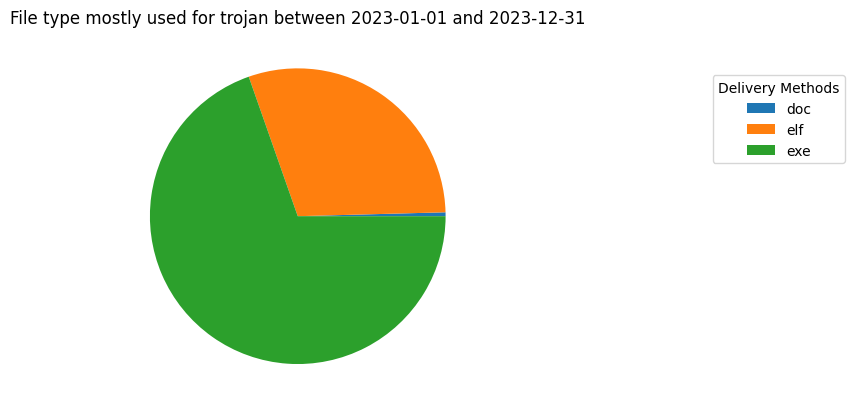

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')
colors = cmap(range(len(malware_summary)))

plt.pie(malware_summary['#times'])

plt.legend(malware_summary['file_type'], title='Delivery Methods', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'File type mostly used for {specific_malware_type} between {from_date} and {to_date}')

# Muestra el gráfico
plt.show()


### Most frequent type associated to a Malwares in the history of reports

In [ ]:
cube1.query(m1["contributors.COUNT"], levels=[ l1['malware'], l1['malware_type']])

contributors.COUNT
malware     malware_type                   
agent tesla adware                       12
            backdoor                     11
            botnet                       19
            downloader                   23
            dropper                      13
...                                     ...
x gen drp   ransomware                   10
            rootkit                      10
            spyware                      11
            trojan                       59
            worm                         16

[273 rows x 1 columns]


### Most common delivery method used in a specific period


In [ ]:
from datetime import date

In [ ]:
from_date = date(2023, 1, 1)
to_date   = date(2023, 12, 31)

In [ ]:
mentioned_malwares = cube3.query(m3["contributors.COUNT"], levels=[l3["malware_type"], l3["malware"], l3['delivery_method'], l3[('merged', 'Date_pulse_date', 'Day')]])
mentioned_malwares

contributors.COUNT
malware_type malware      delivery_method  Year Quarter Month Day                   
adware       aidetect net email attachment 2022 Q2      Jun   10                   1
             bitrat       web download     2022 Q1      Mar   18                   1
                                                Q2      Apr   27                   1
                                                        May   17                   1
                                                              18                   1
...                                                                              ...
worm         x gen drp    unknown          2022 Q2      May   24                   1
                                           2023 Q4      Dec   06                   1
                                                              30                   1
                                                              31                   1
                                           2024 Q1      Jan   02                   1

[482 rows x 1 columns]

In [ ]:
mm_df = pd.DataFrame(mentioned_malwares).reset_index()

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
                 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
                 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Convert 'Month' column to numerical representation
mm_df['M'] = mm_df['Month'].map(month_mapping)

In [ ]:
def create_periodic_summary1(df, from_date, to_date):

  dataframe = pd.DataFrame()

  for i in range(len(df)):

    year   =  int(df.loc[i]['Year'])
    month  =  df.loc[i]['M']
    day    =  int(df.loc[i]['Day'])

    if( ( year >= int(from_date.year) ) & ( month >= int(from_date.month) ) & ( day >= int(from_date.day) ) & ( int(to_date.year) >= year ) & ( int(to_date.month) >= month ) & ( int(to_date.day) >= day)):

      #print(f'{year}-{month}-{day}')

      malware = df.at[i,'malware']
      malware_type = df.at[i,'malware_type']
      counts = df.at[i,'contributors.COUNT']
      delivery_method = df.at[i,'delivery_method']

      data = {
          'malware' : malware,
          'malware_type' : malware_type,
          '#times' : counts,
          'delivery_method' : delivery_method
      }

      row = pd.DataFrame([data])
      dataframe = pd.concat([dataframe, row], ignore_index=True)

  #print(dataframe.columns)

  if(len(dataframe) == 0):
    return 'Empty Dataframe'

  aggregated_df = dataframe.groupby([ 'malware_type', 'malware', 'delivery_method']).sum().reset_index()

  return aggregated_df


In [ ]:
summary = create_periodic_summary1(mm_df, from_date, to_date )
summary

,malware_type,malware,delivery_method,#times
0,adware,bitrat,web download,1
1,adware,nanocore rat,web download,1
2,adware,njrat,web download,1
3,adware,remcos,email attachment,1
4,adware,x gen drp,web download,2
...,...,...,...,...
65,unknown,agent tesla,unknown,2
66,unknown,generickd,unknown,22
67,unknown,unknown,unknown,156
68,worm,unknown,unknown,1


In [ ]:
old_df = summary.groupby('delivery_method').sum().reset_index()
old_df

<ipython-input-103-7e3bdeaa4b21>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  old_df = summary.groupby('delivery_method').sum().reset_index()


,delivery_method,#times
0,email attachment,13
1,unknown,406
2,web download,114


<ipython-input-109-0201515298d6>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('winter_r')


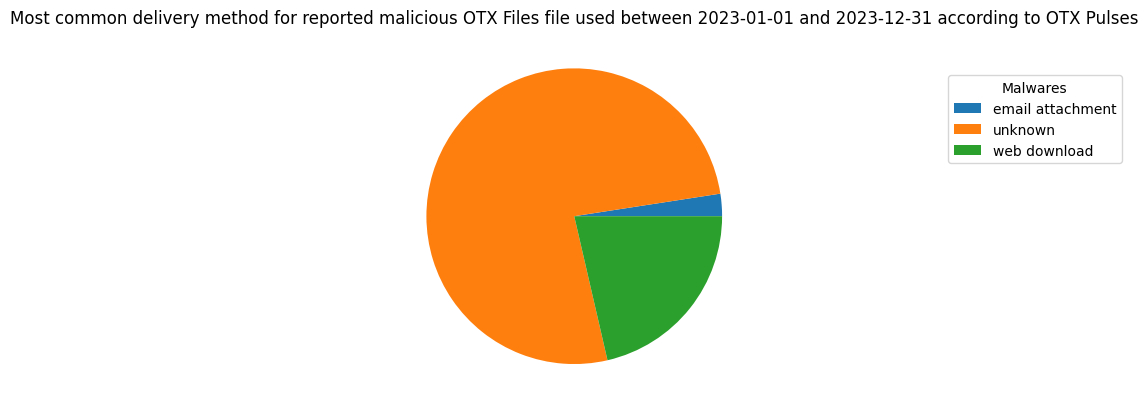

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')
colors = cmap(range(len(old_df)))

plt.pie(old_df['#times'])

plt.legend(old_df['delivery_method'], title='Malwares', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Most common delivery method for reported malicious OTX Files file used between {from_date} and {to_date} according to OTX Pulses')

# Muestra el gráfico
plt.show()

### Most Active Malware in a specific period
Most Active means the malware having the most number of files that has the last seen in this period

In [ ]:
new_df = summary.groupby('malware').sum().reset_index()
new_df

<ipython-input-106-85274cb396b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = summary.groupby('malware').sum().reset_index()


,malware,#times
0,agent tesla,8
1,ave maria,2
2,banker gen,5
3,bitrat,2
4,cobalt strike,2
5,coinminer generic,29
6,crypter gen,1
7,ddos,1
8,generickd,48
9,genmalicious,2


from matplotlib import pyplot as plt
new_df['#times'].plot(kind='hist', bins=20, title='#times')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_df['#times'].plot(kind='line', figsize=(8, 4), title='#times')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-113-7602393e2405>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('winter_r')


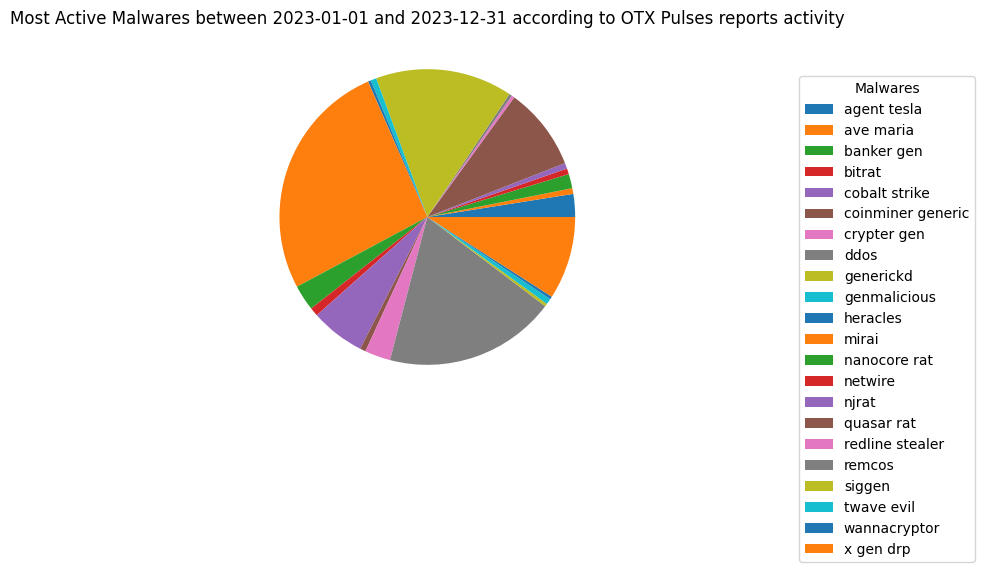

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')
colors = cmap(range(len(new_df)))

plt.pie(new_df[new_df['malware'] != 'unknown']['#times'])

plt.legend(new_df[new_df['malware'] != 'unknown']['malware'], title='Malwares', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Most Active Malwares between {from_date} and {to_date} according to OTX Pulses reports activity')

# Muestra el gráfico
plt.show()

### Most Active Malware Type in a specific period
Most Active means the malware type having the most number of files that has the last seen in this period

In [ ]:
wow_df = summary.groupby('malware_type').sum().reset_index()
wow_df

<ipython-input-114-f2e804b375e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wow_df = summary.groupby('malware_type').sum().reset_index()


,malware_type,#times
0,adware,6
1,backdoor,3
2,botnet,11
3,downloader,16
4,dropper,6
5,keylogger,3
6,ransomware,24
7,rootkit,37
8,spyware,6
9,trojan,237


<ipython-input-115-aa0ebba7b48e>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('winter_r')


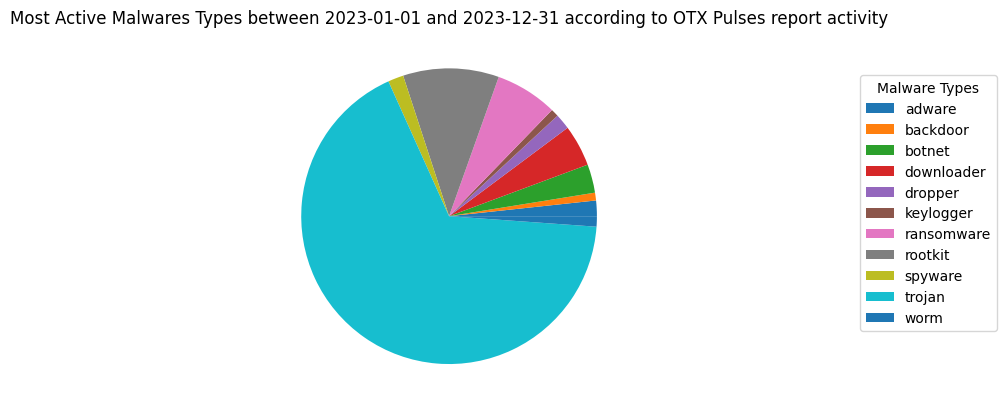

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')
colors = cmap(range(len(summary)))

plt.pie(wow_df[wow_df['malware_type'] != 'unknown']['#times'])

plt.legend(wow_df[wow_df['malware_type'] != 'unknown']['malware_type'], title='Malware Types', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Most Active Malwares Types between {from_date} and {to_date} according to OTX Pulses report activity')

# Muestra el gráfico
plt.show()

# Analyse for a specific Malware the reports time distribution limited and comparison

In [ ]:
mal_t1 = 'trojan'
mal_t2 = 'ransomware'

mal1 = 'mirai'
mal2 = 'remcos'

del_m1 = 'email attachment'
del_m2 = 'web download'

In [ ]:
def create_summary(df, from_date, to_date):

  dataframe = pd.DataFrame()

  for i in range(len(df)):

    year   =  int(df.loc[i]['Year'])
    month  =  df.loc[i]['M']
    day    =  int(df.loc[i]['Day'])

    if( ( year >= int(from_date.year) ) & ( month >= int(from_date.month) ) & ( day >= int(from_date.day) ) & ( int(to_date.year) >= year ) & ( int(to_date.month) >= month ) & ( int(to_date.day) >= day)):

      #print(f'{year}-{month}-{day}')

      malware = df.at[i,'malware']
      malware_type = df.at[i,'malware_type']
      counts = df.at[i,'contributors.COUNT']
      delivery_method = df.at[i,'delivery_method']

      data = {
          'malware' : malware,
          'malware_type' : malware_type,
          'delivery_method' : delivery_method,
          'month' : df.loc[i]['Month'],
          'n_month' : month,
          '#times' : counts

      }

      row = pd.DataFrame([data])
      dataframe = pd.concat([dataframe, row], ignore_index=True)

  #print(dataframe.columns)

  if(len(dataframe) == 0):
    return 'Empty Dataframe'

  aggregated_df = dataframe.groupby([ 'malware_type', 'malware', 'delivery_method', 'month', 'n_month']).sum().reset_index()

  return aggregated_df


In [ ]:
summary0 = create_summary(mm_df, from_date, to_date )
summary0 = summary0.sort_values(by='n_month')

summary0

,malware_type,malware,delivery_method,month,n_month,#times
72,trojan,genmalicious,unknown,Jan,1,2
2,adware,njrat,web download,Jan,1,1
105,trojan,remcos,web download,Jan,1,4
76,trojan,mirai,unknown,Jan,1,1
11,botnet,mirai,unknown,Jan,1,1
...,...,...,...,...,...,...
51,spyware,mirai,unknown,Dec,12,1
48,rootkit,unknown,web download,Dec,12,1
47,rootkit,remcos,web download,Dec,12,1
62,trojan,crypter gen,unknown,Dec,12,1


In [ ]:
summary_mal_type = summary0.groupby([ 'malware_type', 'month', 'n_month']).sum().reset_index()
summary_mal_type = summary_mal_type.sort_values(by='n_month')

summary_mal_type

<ipython-input-169-24ade84377c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_mal_type = summary0.groupby([ 'malware_type', 'month', 'n_month']).sum().reset_index()


,malware_type,month,n_month,#times
1,adware,Jan,1,1
9,botnet,Jan,1,1
39,trojan,Jan,1,9
38,trojan,Feb,2,5
8,botnet,Feb,2,1
6,backdoor,Mar,3,1
42,trojan,Mar,3,7
10,botnet,Mar,3,1
26,rootkit,Apr,4,2
35,trojan,Apr,4,11


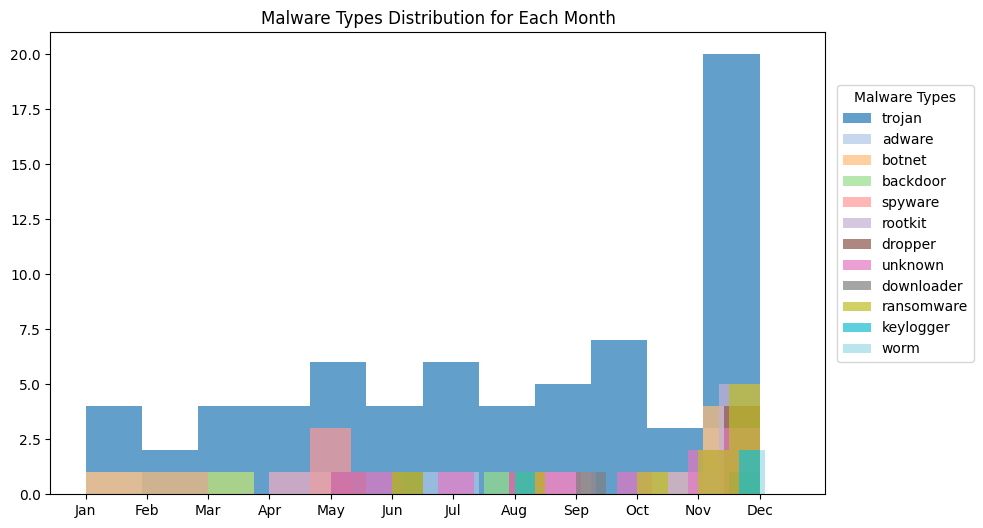

In [ ]:
from matplotlib.cm import get_cmap
import numpy as np

colors = cmap(range(len(summary0)))

malware_types = summary0['malware_type'].unique()

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(malware_types)))

summary0_sorted = summary0.sort_values(by='n_month')

# Plot histogram
plt.figure(figsize=(10, 6))

for i, malware_type in enumerate(malware_types):
    subset_df = summary0_sorted[summary0_sorted['malware_type'] == malware_type]
    plt.hist(subset_df['month'], bins=summary0_sorted['month'].nunique(),
             label=malware_type, color=colors[i], alpha=0.7)

# Add legend
plt.legend(title='Malware Types', loc='upper right', bbox_to_anchor=(1.2, 0.9))

# Add a title
plt.title('Malware Types Distribution for Each Month')

# Show the plot
plt.show()

In [ ]:
summary_m = summary0[summary0.malware != 'unknown']
summary_m

,malware_type,malware,delivery_method,month,n_month,#times
72,trojan,genmalicious,unknown,Jan,1,2
2,adware,njrat,web download,Jan,1,1
105,trojan,remcos,web download,Jan,1,4
76,trojan,mirai,unknown,Jan,1,1
11,botnet,mirai,unknown,Jan,1,1
...,...,...,...,...,...,...
52,spyware,remcos,email attachment,Dec,12,1
51,spyware,mirai,unknown,Dec,12,1
47,rootkit,remcos,web download,Dec,12,1
62,trojan,crypter gen,unknown,Dec,12,1


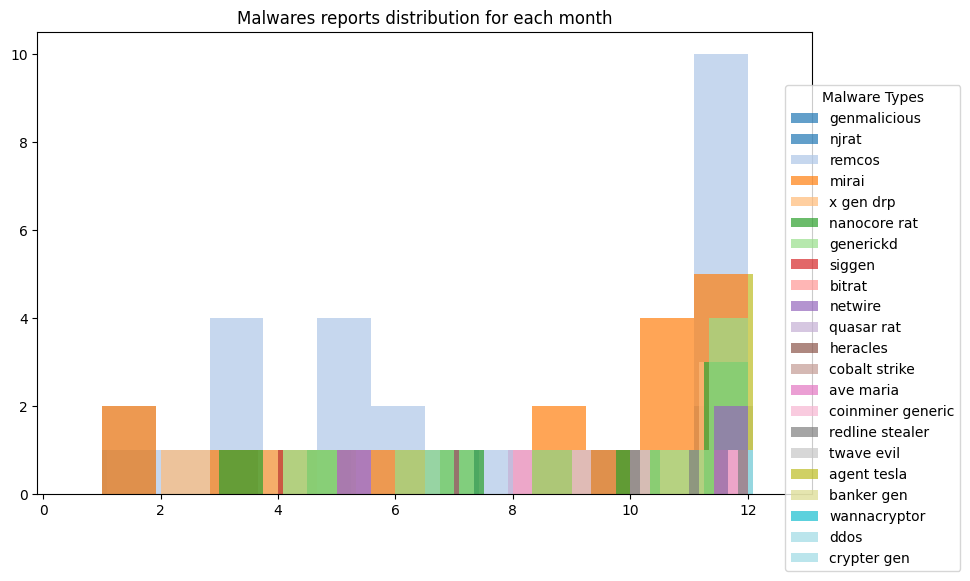

In [ ]:
from matplotlib.cm import get_cmap
import numpy as np

colors = cmap(range(len(summary0)))

summary_m = summary0[summary0.malware != 'unknown']

malware_types = summary_m['malware'].unique()

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(malware_types)))

summary0_sorted = summary_m.sort_values(by='n_month')

# Plot histogram
plt.figure(figsize=(10, 6))

for i, malware_type in enumerate(malware_types):
    subset_df = summary0_sorted[summary0_sorted['malware'] == malware_type]
    plt.hist(subset_df['n_month'], bins=summary0_sorted['month'].nunique(),
             label=malware_type, color=colors[i], alpha=0.7)

# Add legend
plt.legend(title='Malware Types', loc='upper right', bbox_to_anchor=(1.2, 0.9))

# Add a title
plt.title('Malwares reports distribution for each month')

# Show the plot
plt.show()

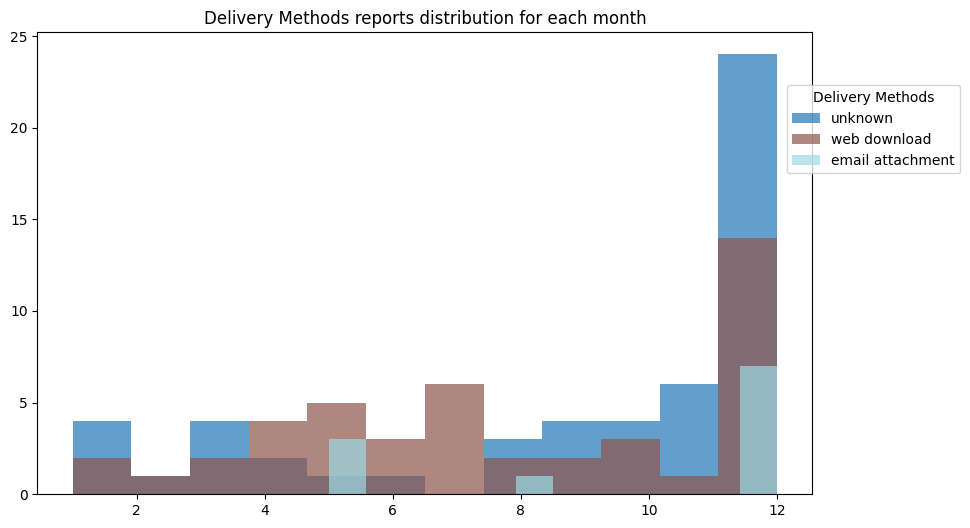

In [ ]:
from matplotlib.cm import get_cmap
import numpy as np

colors = cmap(range(len(summary0)))

summary_m = summary0[summary0.malware != 'unknown']

malware_types = summary_m['delivery_method'].unique()

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(malware_types)))

summary0_sorted = summary_m.sort_values(by='n_month')

# Plot histogram
plt.figure(figsize=(10, 6))

for i, malware_type in enumerate(malware_types):
    subset_df = summary0_sorted[summary0_sorted['delivery_method'] == malware_type]
    plt.hist(subset_df['n_month'], bins=summary0_sorted['month'].nunique(),
             label=malware_type, color=colors[i], alpha=0.7)

# Add legend
plt.legend(title='Delivery Methods', loc='upper right', bbox_to_anchor=(1.2, 0.9))

# Add a title
plt.title('Delivery Methods reports distribution for each month')

# Show the plot
plt.show()

# Behaviours Cube

### Files - *Behaviours*

In [ ]:
entries.join(behaviours,  entries['sha1'] == behaviours['sha1'] )

In [ ]:
#entries.join(behaviours,  entries['sha256'] == behaviours['sha256'] )

In [ ]:
#entries.join(behaviours,  entries['md5'] == behaviours['md5'] )

In [ ]:
#behaviours.join(entries,  behaviours['sha1'] == entries['sha1'] )

In [ ]:
#behaviours.join(entries,  behaviours['sha256'] == entries['sha256'] )

In [ ]:
#behaviours.join(entries,  behaviours['md5'] == entries['md5'] )

In [ ]:
cube_b = session.create_cube(entries)

In [ ]:
'''
cube_b.create_date_hierarchy(
    "Date_analysis_date",
    column=entries["analysis_date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

cube_b.create_date_hierarchy(
    "Date_first_seen",
    column=entries["first_seen"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)

cube_b.create_date_hierarchy(
    "Date_last_seen",
    column=entries["last_seen"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MMM", "Day": "dd"},
)
'''

In [ ]:
cube_b.schema

In [ ]:
h, l, m = cube_b.hierarchies, cube_b.levels, cube_b.measures

In [ ]:
cube_b

In [ ]:
h

In [ ]:
l

In [ ]:
m

## Behaviour Queries

### Most Behaviours malicious Area common for a malware type


In [ ]:
### INPUT

maliciousness_level = 'malicious'
malware_type = 'trojan'


In [ ]:
_df1 = cube_b.query(m["contributors.COUNT"], levels=[l['malware_type'], l['maliciousness_level'], l['area'], l['maliciousness_level']])
type(_df1)

In [ ]:
df_from_query = pd.DataFrame(_df1).reset_index()
df_from_query

In [ ]:
def create_periodic_summary( df, mal_level, mal_type ):

  dataframe = pd.DataFrame()

  print(type(df))

  for i in range(len(df)):

    mal_type_i   =  df.loc[i]['malware_type']
    mal_level_i  =  df.loc[i]['maliciousness_level']

    if( ( mal_type == mal_type_i ) & ( mal_level_i == mal_level )):

      area = df.at[i,'area']
      counts = df.at[i,'contributors.COUNT']

      data = {
          'area' : area,
          '#times' : counts,
         # 'operation per file' : counts/operationNumber * 100 ,
      }

      row = pd.DataFrame([data])
      dataframe = pd.concat([dataframe, row], ignore_index=True)
  aggregated_df = dataframe.groupby([ 'area' ]).sum().reset_index()

  return aggregated_df


In [ ]:
summary = create_periodic_summary( df_from_query, maliciousness_level, malware_type )
summary

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')
colors = cmap(range(len(summary)))

plt.pie(summary['#times'])

plt.legend(summary['area'], title='Impact Area', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Most common area of impact of the malicious behaviours for {malware_type}')

# Muestra el gráfico
plt.show()

In [ ]:
len = cube_b.query(m["contributors.COUNT"], levels=[l['malware_type'], l['maliciousness_level'], l['sha1']])
maliciousOperations = len.groupby([ 'malware_type', 'maliciousness_level' ]).sum().reset_index()
operationNumber = int(maliciousOperations[(maliciousOperations.maliciousness_level == maliciousness_level) & (maliciousOperations.malware_type == malware_type)]['contributors.COUNT'])
print(operationNumber)

In [ ]:
summary['%presence'] = summary['#times'] / operationNumber
new_summary = summary.copy()
new_summary

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

cmap = get_cmap('winter_r')

plt.pie(new_summary['%presence'])

plt.legend(new_summary['area'], title='Impact Area', loc='upper right', bbox_to_anchor=(2, 0.9))

# Add a title
plt.title(f'Impact Area Percentage in each {malware_type} file')

# Muestra el gráfico
plt.show()

### Most Behaviours Area mentioned for a malware


### Most Behaviours Area mentioned for a malware
